In [932]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


## Data cleaning

In [933]:
df=pd.read_csv('P3.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [934]:
df.shape

(200, 5)

In [935]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [936]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [937]:

mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(mapping).astype('Int64')
df.dtypes

CustomerID                int64
Gender                    Int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [938]:
df=df.drop('CustomerID', axis=1)

In [939]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [940]:
agg_client= df.groupby(['Gender'])[['Age','Annual Income (k$)','Spending Score (1-100)']].agg([min,max])
agg_client

Age     Annual Income (k$)      Spending Score (1-100)    
       min max                min  max                    min max
Gender                                                           
0       18  70                 15  137                      1  97
1       18  68                 16  126                      5  99

In [941]:
df['Annual Income (k$)'].value_counts()

Annual Income (k$)
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: count, Length: 64, dtype: int64

In [942]:
df['Spending Score (1-100)'].value_counts()

Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64

## Preparing data

In [943]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])
X


array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## K mean method

In [944]:
from sklearn.cluster import KMeans

c:\Users\Ali\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


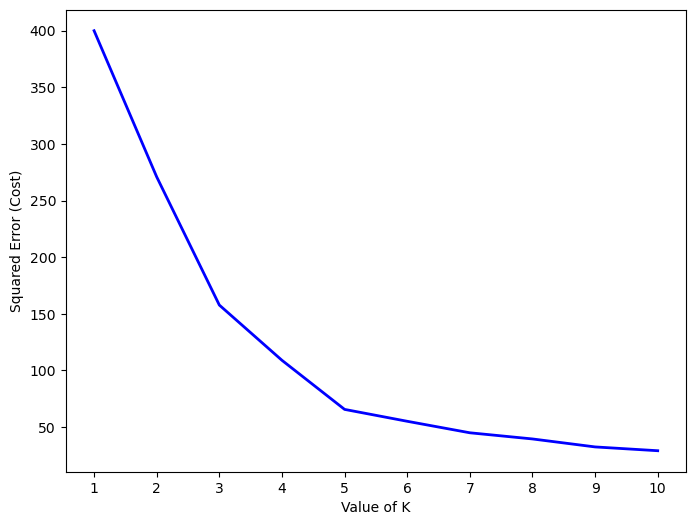

In [945]:
cost =[]
for i in range(1, 11):
	KM = KMeans(n_clusters = i, max_iter = 500)
	KM.fit(X)
	
	# calculates squared error
	# for the clustered points
	cost.append(KM.inertia_)	

# plot the cost against K values
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), cost, color ='b', linewidth ='2')
plt.locator_params(axis='x', nbins=10)
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show()



# the elbow is happening in almost k=5

In [946]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 1 2 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 1 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


In [947]:
df["Clus_km"] = labels
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,0,19,15,39,2
1,0,21,15,81,4
2,1,20,16,6,2
3,1,23,16,77,4
4,1,31,17,40,2


In [948]:
df.groupby('Clus_km').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,
0,0.457143,41.114286,88.200000,17.114286
1,0.592593,42.716049,55.296296,49.518519
2,0.608696,45.217391,26.304348,20.913043
3,0.538462,32.692308,86.538462,82.128205
4,0.590909,25.272727,25.727273,79.363636


In [949]:
X_np = np.nan_to_num(df)


C:\Users\Ali\AppData\Local\Temp\ipykernel_4000\1499584088.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X_np[:, 2], X_np[:, 3],c=labels.astype(np.float), alpha=0.5)


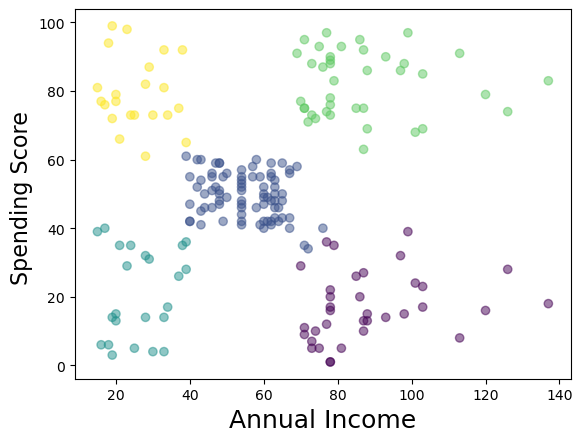

In [950]:
area = np.pi * ( X_np[:, 1])**2  
plt.scatter(X_np[:, 2], X_np[:, 3],c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Annual Income', fontsize=18)
plt.ylabel('Spending Score ', fontsize=16)

plt.show()

C:\Users\Ali\AppData\Local\Temp\ipykernel_4000\2607494782.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
C:\Users\Ali\AppData\Local\Temp\ipykernel_4000\2607494782.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X_np[:, 2], X_np[:, 3],X_np[:, 1], c= labels.astype(np.float))


c:\Users\Ali\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


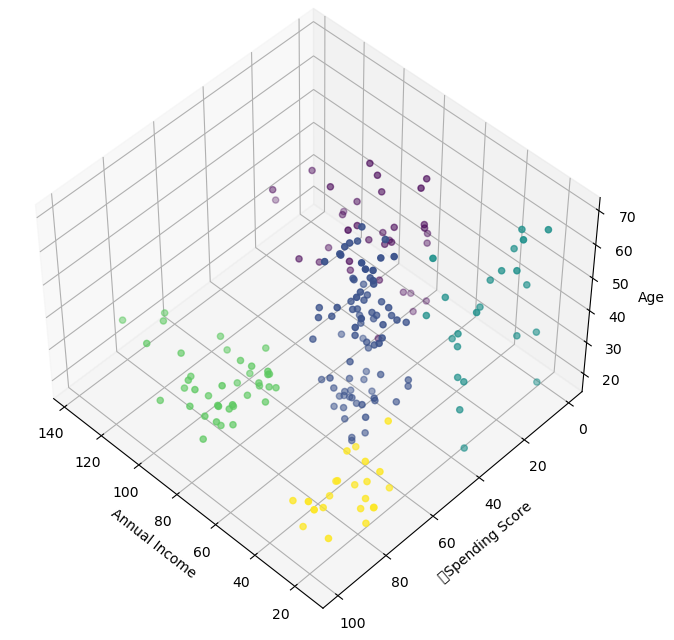

In [951]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

ax.set_xlabel('Annual Income ')
ax.set_ylabel('	Spending Score ')
ax.set_zlabel('Age')
ax.scatter(X_np[:, 2], X_np[:, 3],X_np[:, 1], c= labels.astype(np.float))

## Hierarchical method

In [952]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(X,X) 
print(dist_matrix)

[[0.         1.63050555 1.28167999 ... 4.44935328 4.72749573 4.96007568]
 [1.63050555 0.         2.91186723 ... 4.24551281 5.25987762 4.65731761]
 [1.28167999 2.91186723 0.         ... 4.95958139 4.64193658 5.50147501]
 ...
 [4.44935328 4.24551281 4.95958139 ... 0.         2.21418015 0.54622499]
 [4.72749573 5.25987762 4.64193658 ... 2.21418015 0.         2.52340145]
 [4.96007568 4.65731761 5.50147501 ... 0.54622499 2.52340145 0.        ]]


In [953]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\Ali\AppData\Local\Temp\ipykernel_4000\3409742170.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


Text(0, 0.5, 'Customer ID')

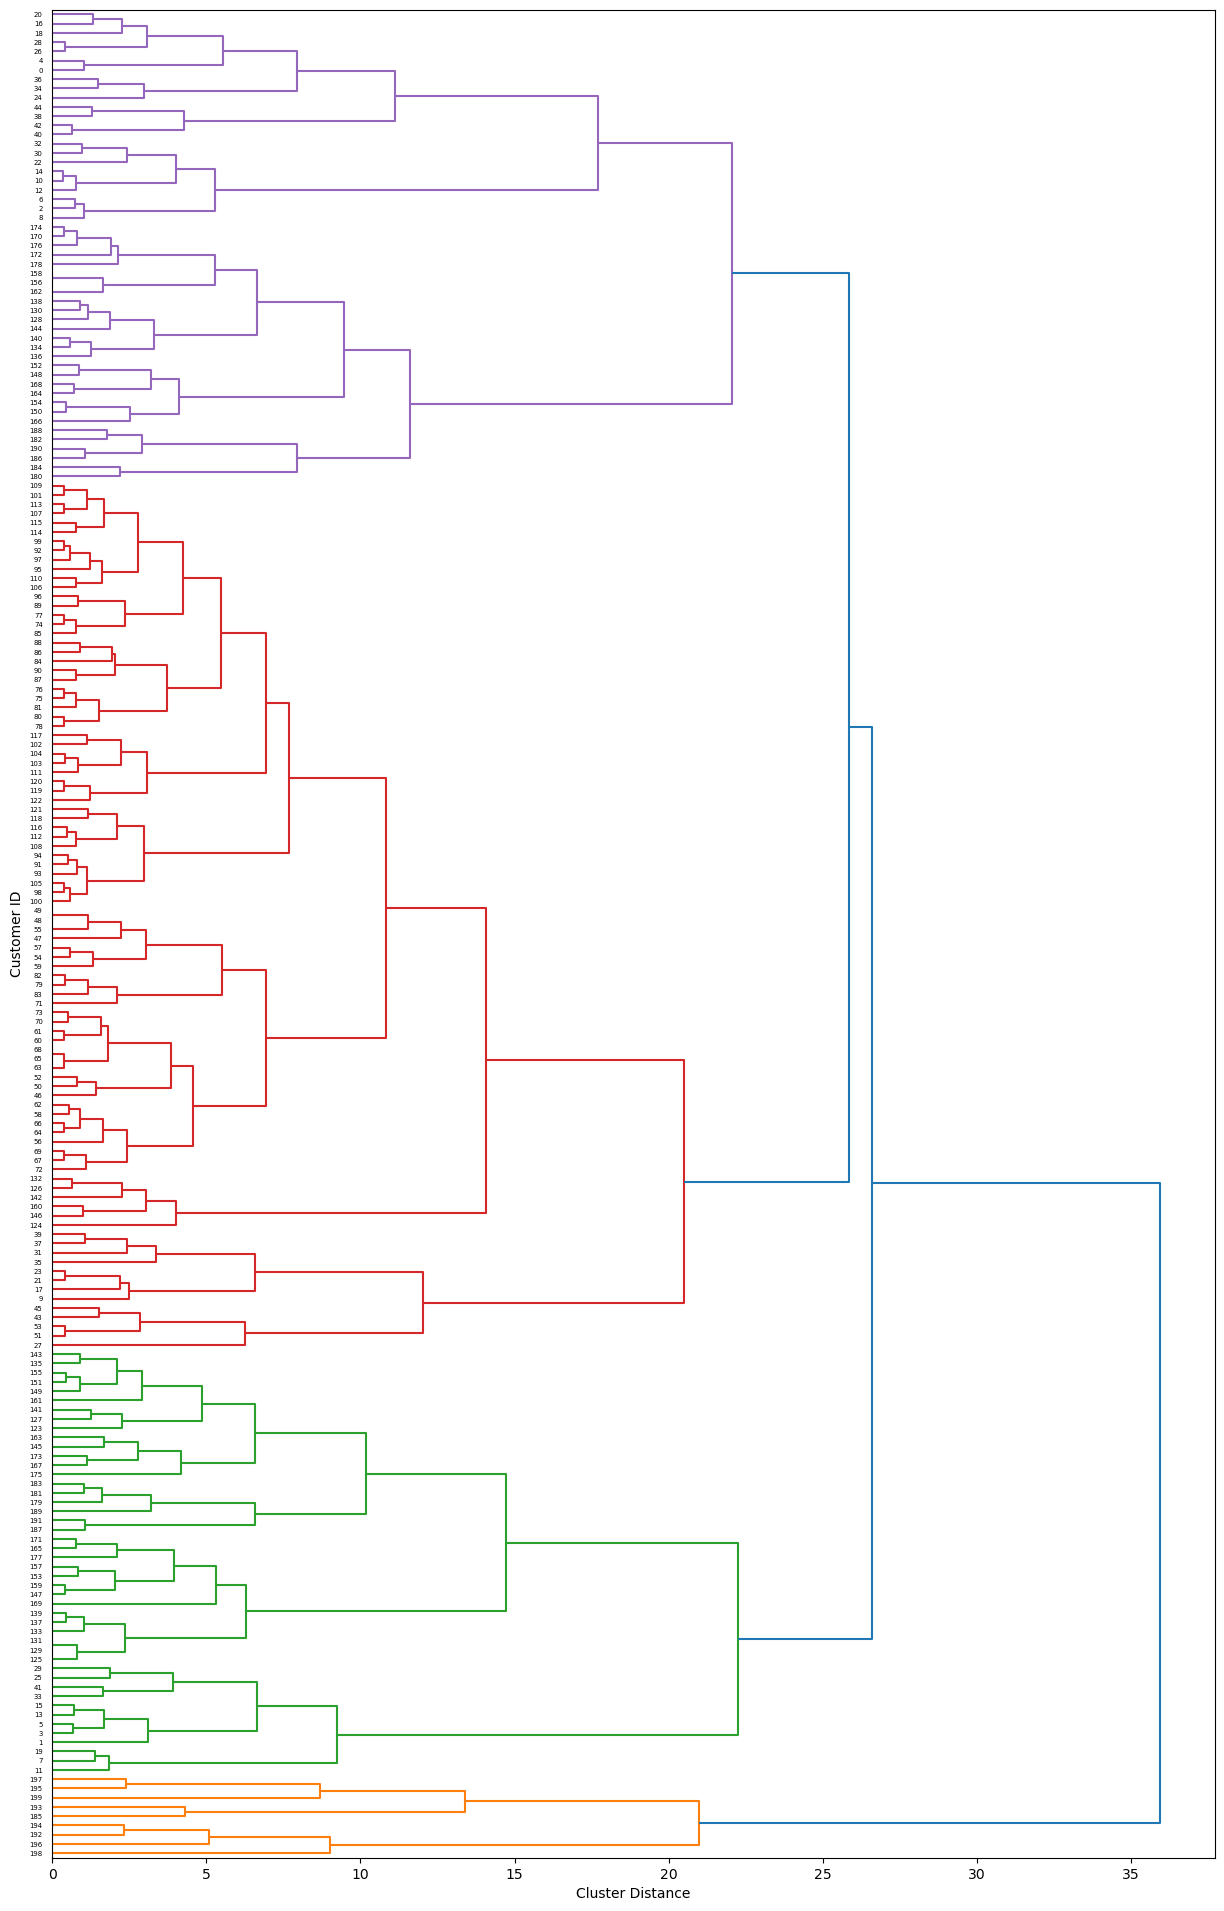

In [954]:
plt.figure(figsize=(15, 24))
dendro = hierarchy.dendrogram(Z,leaf_rotation=0,orientation = 'right')
plt.xlabel('Cluster Distance')
plt.ylabel('Customer ID')

In [955]:
from sklearn.cluster import AgglomerativeClustering 
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom.fit(X)

agglom.labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

In [956]:
df['Clus_Hierarchical'] = agglom.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km,Clus_Hierarchical
0,0,19,15,39,2,1
1,0,21,15,81,4,3
2,1,20,16,6,2,1
3,1,23,16,77,4,3
4,1,31,17,40,2,1


In [957]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)
df.head()

,Gender,Age,Annual_Income,Spending_Score,Clus_km,Clus_Hierarchical
0,0,19,15,39,2,1
1,0,21,15,81,4,3
2,1,20,16,6,2,1
3,1,23,16,77,4,3
4,1,31,17,40,2,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'Spending Score')

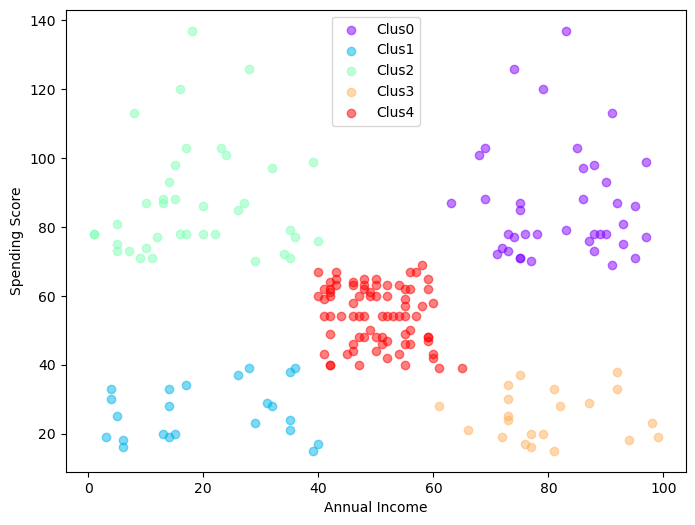

In [958]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(8,6))

for color, label in zip(colors, cluster_labels):
    subset = df[df.Clus_Hierarchical == label]
    plt.scatter(subset.Spending_Score, subset.Annual_Income, c=color, label='Clus'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [959]:
agg_client= df.groupby(['Clus_Hierarchical','Gender'])[['Age','Annual_Income','Spending_Score']].mean()
agg_client

Age  Annual_Income  Spending_Score
Clus_Hierarchical Gender                                          
0                 0       33.277778      87.111111       82.666667
                  1       32.190476      86.047619       81.666667
1                 0       48.333333      24.666667       19.666667
                  1       43.214286      27.357143       21.714286
2                 0       39.500000      85.150000       14.050000
                  1       41.388889      89.055556       23.722222
3                 0       25.000000      25.777778       77.666667
                  1       25.583333      24.583333       81.833333
4                 0       45.437500      54.718750       50.750000
                  1       41.148936      54.212766       49.851064

## DBscan method

In [960]:
from sklearn.cluster import DBSCAN
import sklearn.utils

sklearn.utils.check_random_state(1000)

# Compute DBSCAN
db = DBSCAN(eps=0.36,min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels
df["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


df.head()


,Gender,Age,Annual_Income,Spending_Score,Clus_km,Clus_Hierarchical,Clus_Db
0,0,19,15,39,2,1,2
1,0,21,15,81,4,3,0
2,1,20,16,6,2,1,1
3,1,23,16,77,4,3,0
4,1,31,17,40,2,1,2


In [961]:
unique_labels=set(labels)

In [962]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

Text(0, 0.5, 'Transformed Spending Score')

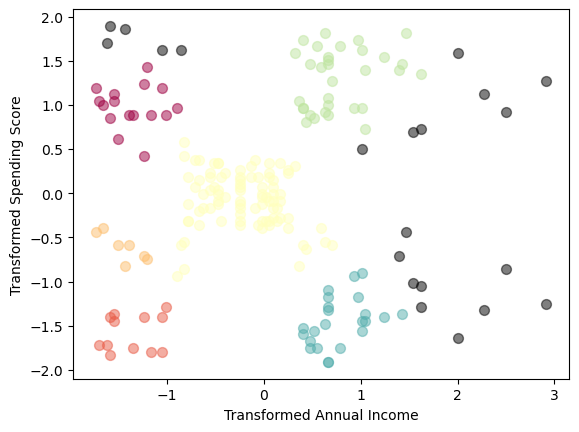

In [963]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)
    
    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

plt.xlabel('Transformed Annual Income')
plt.ylabel('Transformed Spending Score')